# Job Placement Classification

## Context

Due to the growing need for educated and talented individuals, especially in developing countries, recruiting fresh graduates is a routine practise for organizations. Conventional recruiting methods and selection processes can be prone to errors, and in order to optimise the whole process, some innovative methods are needed.

## Inspirations

* Can you monitor past data and use machine learning to predict whether the candidate gets placed?

## Data dictionary

This file contains different attributes of the candidate's educational history and work experience. The detailed data dictionary is given below:

* __gender__ (gender of the candidate)
* __ssc_percentage__ (senior secondary exams percentage - 10th grade)
* __ssc_board__ (board of education for SSC exams)
* __hsc_percentage__ (higher secondary exams percentage - 12th grade)
* __hsc_board__ (board of education for HSC exams)
* __hsc_subject__ (subject of study for HSC)
* __degree_percentage__ (percentage of marks in an undergraduate degree)
* __undergrad_degree__ (undergraduate degree majors)
* __work_experience__ (past work experience)
* __emp_test_percentage__ (aptitude test percentage)
* __specialization__ (postgraduate degree majors - MBA specialization)
* __mba_percent__ (percentage of marks in MBA degree)
* __status__ (status of the placement - __target__)

## Libraries

* [pandas](https://pandas.pydata.org) (data manipulation and analysis)
* [NumPy](https://numpy.org) (numerical computing)
* [Matplotlib](https://matplotlib.org) & [seaborn](https://seaborn.pydata.org) (data visualization)
* [scikit-learn](https://scikit-learn.org) (machine learning)
* [imbalanced-learn](https://imbalanced-learn.org) (imbalanced dataset)

## Author

[LinkedIn](https://www.linkedin.com/in/brckvlo)
[GitHub](https://github.com/brckalo)
[Instagram](https://www.instagram.com/milvnbr)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report

from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("./job_placement_dataset.csv")

In [3]:
df.shape

(215, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [5]:
numerical_features = df.select_dtypes(exclude="object").columns.tolist()
categorical_features = df.select_dtypes(include="object").columns.tolist()

for column in categorical_features:
    df[column] = df[column].apply(lambda x : x.lower())

In [6]:
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,m,67.00,others,91.00,others,commerce,58.00,sci&tech,no,55.0,mkt&hr,58.80,placed
1,m,79.33,central,78.33,others,science,77.48,sci&tech,yes,86.5,mkt&fin,66.28,placed
2,m,65.00,central,68.00,central,arts,64.00,comm&mgmt,no,75.0,mkt&fin,57.80,placed
3,m,56.00,central,52.00,central,science,52.00,sci&tech,no,66.0,mkt&hr,59.43,not placed
4,m,85.80,central,73.60,central,commerce,73.30,comm&mgmt,no,96.8,mkt&fin,55.50,placed


In [7]:
df.isna().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

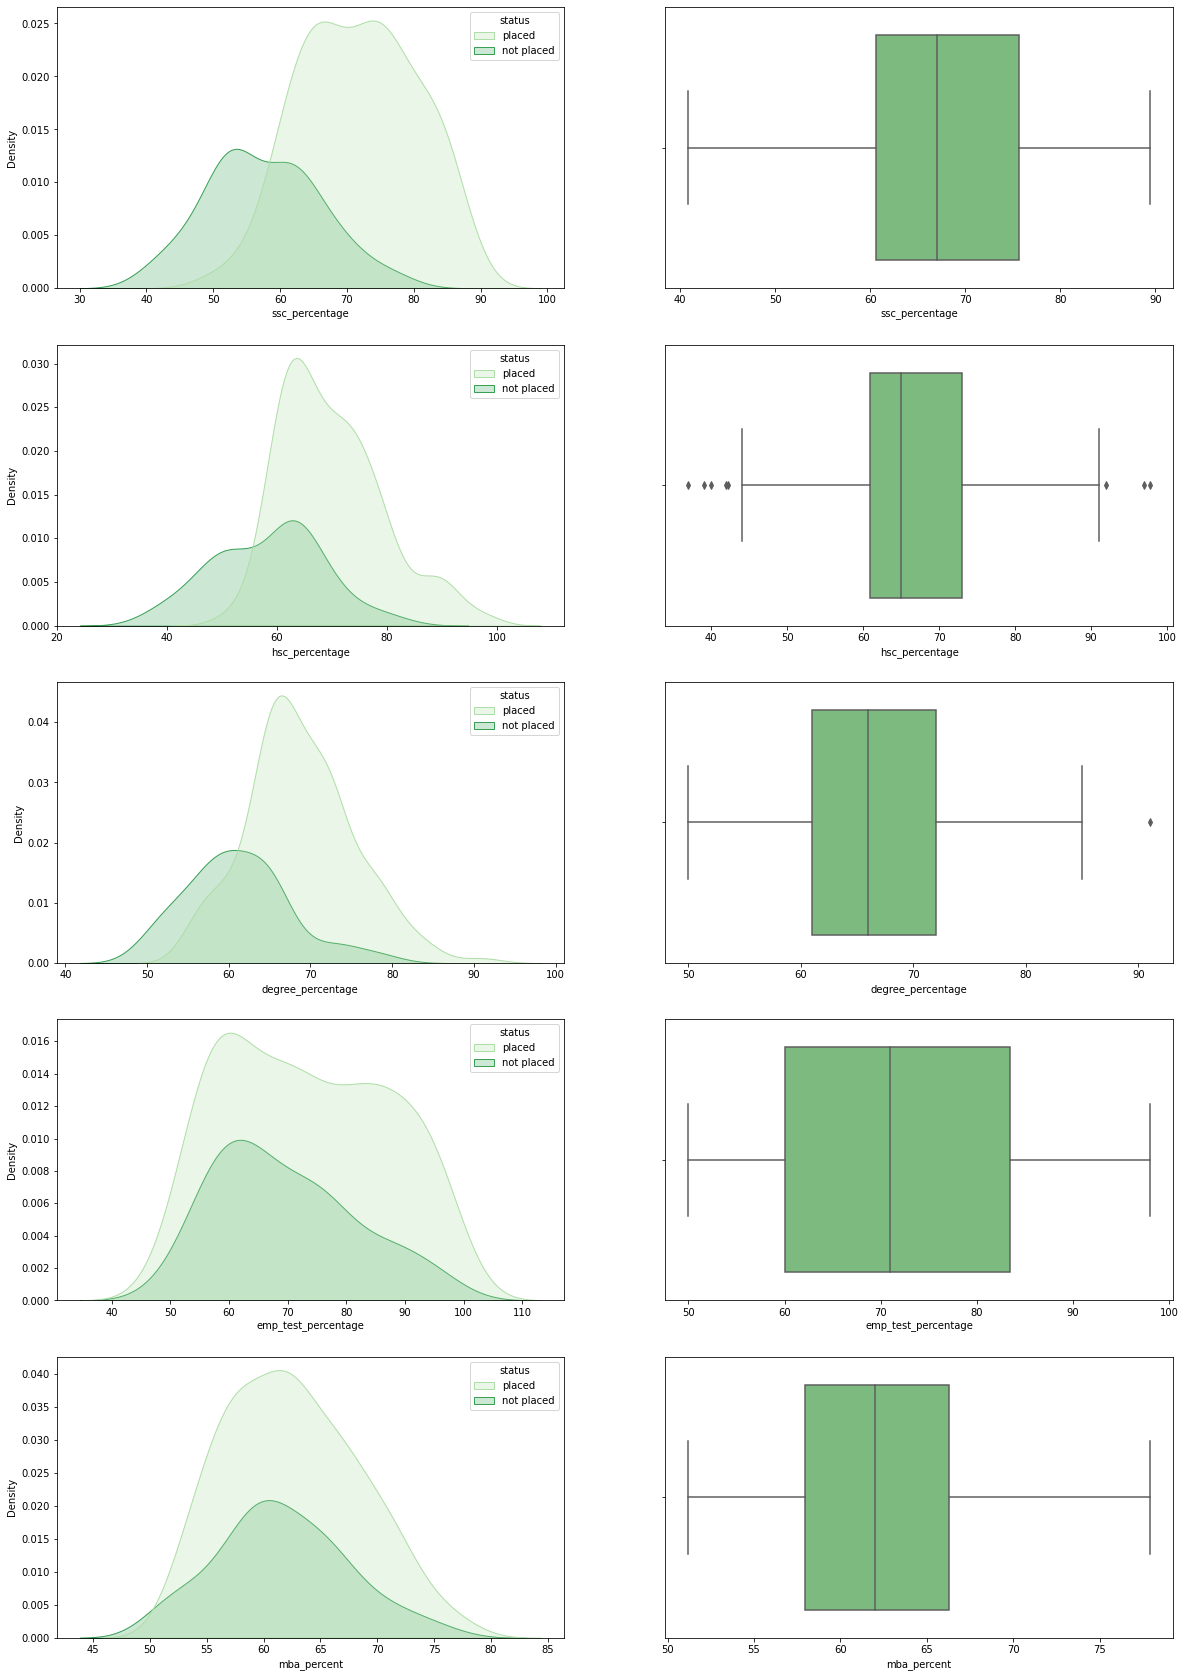

In [8]:
fig,ax = plt.subplots(nrows=5,ncols=2,figsize=(20,30))

for i in range(5):
    sns.kdeplot(data=df,x=numerical_features[i],hue="status",palette="Greens",fill=True,ax=ax[i,0])
    sns.boxplot(data=df,x=numerical_features[i],hue="status",palette="Greens",ax=ax[i,1])

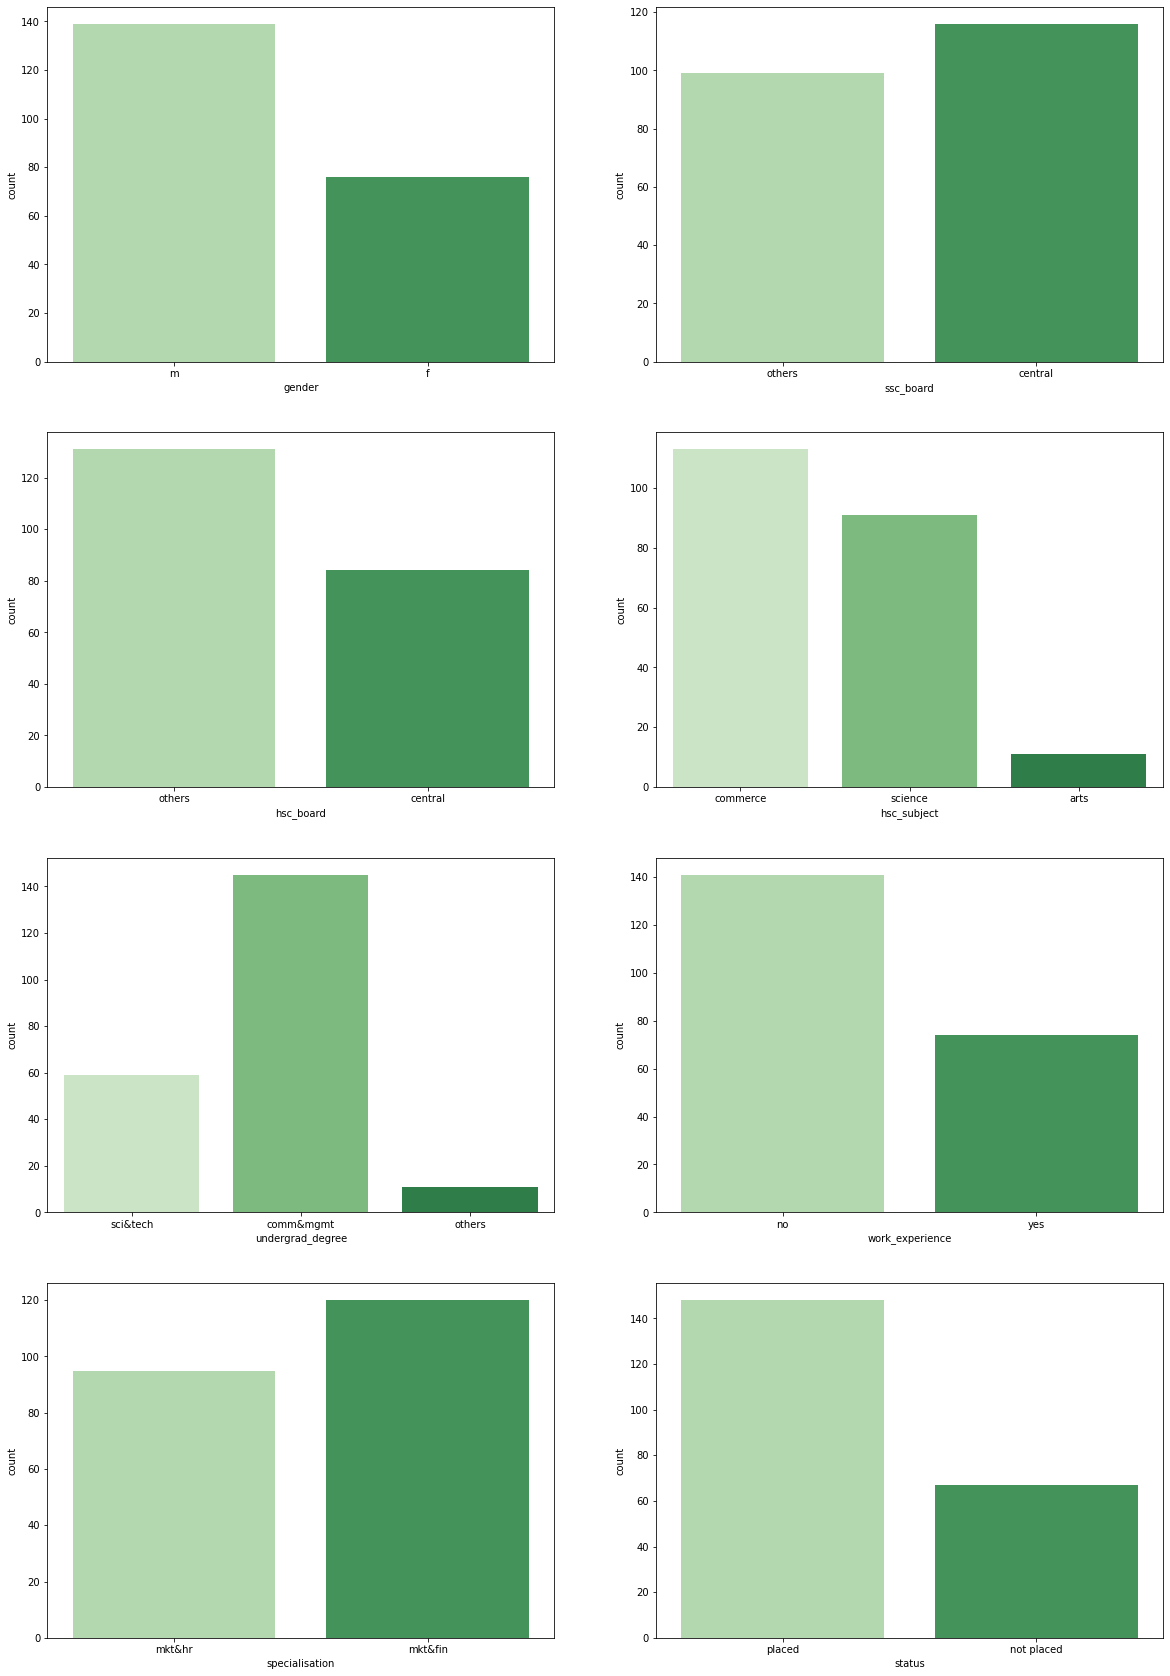

In [9]:
fig,ax = plt.subplots(nrows=4,ncols=2,figsize=(20,30))

for i in range(4):
    for j in range(2):
        sns.countplot(data=df,x=categorical_features[2*i+j],palette="Greens",ax=ax[i,j])

In [10]:
categorical_features.remove("status")

df[numerical_features] = StandardScaler().fit_transform(df[numerical_features])

df[categorical_features] = OrdinalEncoder().fit_transform(df[categorical_features])

df["status"] = LabelEncoder().fit_transform(df["status"])

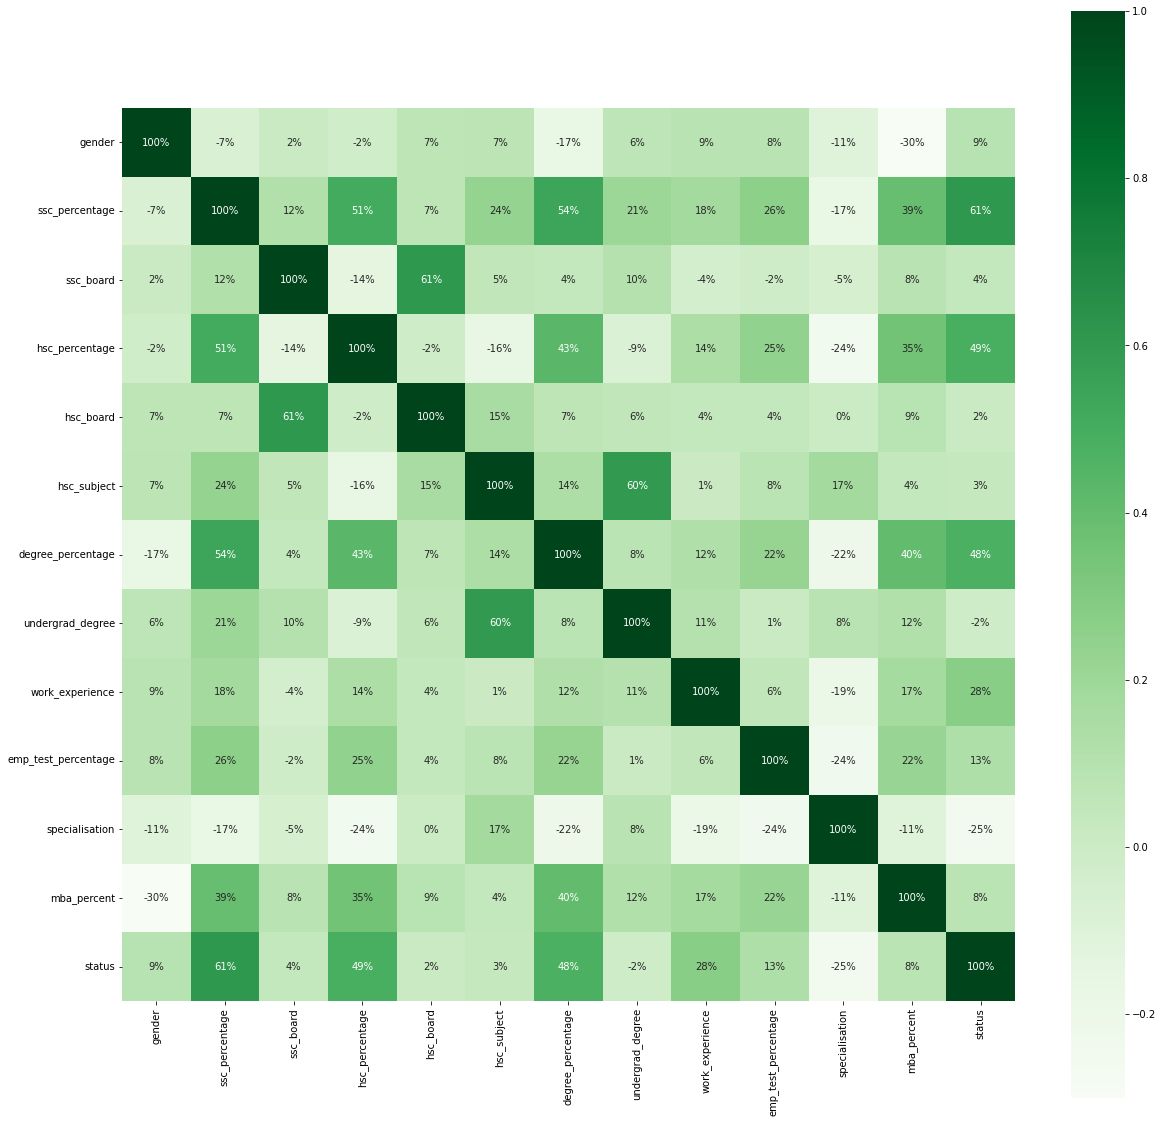

In [11]:
plt.figure(figsize=(20,20))

sns.heatmap(df.corr(),cmap="Greens",annot=True,fmt=".0%",square=True)

plt.show()

In [12]:
X = df[[
    "ssc_percentage",
    "hsc_percentage",
    "degree_percentage",
    "work_experience",
    "emp_test_percentage",
    "mba_percent"
]]
y = df["status"]

In [13]:
X,y = SMOTE().fit_resample(X,y)

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [15]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((236, 6), (60, 6), (236,), (60,))

In [16]:
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "SVC": SVC()
}

In [17]:
cv = StratifiedKFold(n_splits=4)

In [18]:
estimation_stats = []

model = {
    "classifier": None,
    "score": 0.0
}

for c in classifiers:
    estimation = cross_validate(
        classifiers[c],
        X_train,
        y_train,
        scoring="accuracy",
        cv=cv,
        n_jobs=-1,
        return_train_score=True,
        return_estimator=True
    )
    
    estimation_stats.append([c,np.amin(estimation["train_score"]),np.amin(estimation["test_score"])])

    train_score = np.amin(estimation["train_score"])
    test_score= np.amin(estimation["test_score"])
    
    if (test_score - train_score) < model["score"]:
        model = {
            "classifier": estimation["estimator"][-1],
            "score": np.amin(estimation["test_score"])
        }

pd.DataFrame(estimation_stats,columns=["estimator","train_score","test_score"])

,estimator,train_score,test_score
0,LogisticRegression,0.898305,0.881356
1,KNeighborsClassifier,0.892655,0.864407
2,DecisionTreeClassifier,1.000000,0.779661
3,RandomForestClassifier,1.000000,0.847458
4,SVC,0.920904,0.864407


In [19]:
y_pred = model["classifier"].predict(X_test)

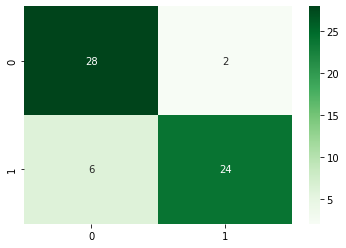

In [20]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)),cmap="Greens",annot=True,fmt="g")

plt.show()

In [21]:
print(classification_report(y_test,y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        30
           1       0.92      0.80      0.86        30

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60

